<center><h2><font color='black'>Homework 1</font></h2></center>
<center><h4><font color='black'>CSE 6240</font></h4></center>
<center><h4><font color='black'>Adam Lieberman</font></h4></center>

<center><h2><font color='black'>Kaggle Tutorial</font></h2></center>

<p>To start, we need the following imports. Please make sure that stop words are downloaded. You can uncheck nltk.download() in the code block, run the cell, go to Corpora and then download stopwords if you do not have it on your machine.</p>

In [1]:
from bs4 import BeautifulSoup
import re 
import nltk
#nltk.download()
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd

<p>Let us breakdown what each package will help us do:</p>
<ul>
<li>BeautifulSoup - This will help us clean our data by removing markup tags from our reviews.</li>
<li>re - This will help us clean our data by having only letters in our reviews </li>
<li>nltk - The natural language tooklit will allow us to import stop words (words that have no importance in NLP) and use a variety of vectorizers and transformers to perform natural langauge processing on our data.</li>
<li>Numpy - We will use numpy arrays and fucntions to store, organize, and edit our data.</li>
<li>Pandas - We will use the pandas dataframe to store our data, organize it, and edit it.</li>
</ul>

<p>Our data could be messy. The function below cleans our data. It removes markup, keeps only letters, makes all letters lowercase, tokenizes the words, and removes stop words.</p>

In [2]:
def clean_data(raw_text): 
    no_markup = BeautifulSoup(raw_text,"html.parser").get_text()  #Removes markup
    letters = re.sub("[^a-zA-Z]", " ",no_markup)                  #Keeps only letters
    lower_case = letters.lower()                                  #Keeps all words lowercase
    tok = lower_case.split()                                      #Tokenizes
    stop_words = set(stopwords.words("english"))                  #Create set of stopwords
    wrds = [w for w in tok if w not in stop_words]                #Removes stopwords
    return(" ".join(wrds))

<p>We now load our training data and store it in a pandas dataframe as follows:</p>

In [3]:
train_data = pd.read_csv("labeledTrainData.tsv",header=0,delimiter="\t",quoting=3)

<p>With our data loaded into a pandas dataframe, we need to clean the reviews. We can get the total number of reviews and iterate over it to pass each review into the clean_data() function. We do so as follows:</p> 

In [4]:
num_reviews = train_data["review"].size           #Getting the total number of reviews
clean_reviews = []                                #Creating empty list to hold cleaned reviews
for i in range(0,num_reviews): 
    clean_reviews.append(clean_data(train_data["review"][i])) #appending cleaned reviews

<p>We can now create our CountVectorizer. We want the following parameters:</p>
<ul>
<li>analyzer = "word"</li>
<li>tokenizer = None</li>
<li>preprocessor = None</li>
<li>Stop_words = None</li>
<li>max_features = 5000</li>
</ul>
<p>We only want 5000 features as having too many features could lead to poor results. We set up our CountVectorizer as follows:</p>

In [5]:
vectorizer = CountVectorizer(analyzer="word",tokenizer=None,preprocessor=None,stop_words=None,max_features=5000)

<p>Now that we have our vectorizer, we can create our training features:</p>

In [6]:
train_data_features = vectorizer.fit_transform(clean_reviews)

<center><h2><font color='black'>Question 1</font></h2></center>

<p>Let us now create X_counts. To do this, we can simply use fit_transform on our clean_reviews (which we do above) and make this data a numpy array. We do so as follows:</p>

In [7]:
from scipy.sparse import csr_matrix
X_counts = train_data_features.toarray()

<p>Let us now construct X_binary. To do this we will first create a copy of X_counts so that we do not change the X_counts array. We can then mask the array using a conditional. If the element is > 0 then we will set that element to 1. We do so as follows:</p>

In [8]:
X_binary = X_counts.copy()
X_binary[X_binary > 0] = 1 

<p>To construct X_tfidf we will first create a transformer from TfidfTransformer. Here, we need to set smooth_idf = False. We can then use fit_transform on a copy of X_counts and then make this variable an array. This will give us X_tfidf. The process is as follows:</p>

In [9]:
X_tfidf = X_counts.copy()
transformer = TfidfTransformer(smooth_idf=False)
X_tfidf = transformer.fit_transform(X_tfidf)
X_tfidf = X_tfidf.toarray()

<p>We now can calcualte X_binary_imbalance. We first need to find the rows of our train_data that correspond to sentiment being a value of 1. We then take the index values of these rows. We do so as follows</p>

In [10]:
np.random.seed(0)

pos_sent = train_data[train_data["sentiment"] == 1]
pos_sent_indx = pos_sent.index

<p>We now need to randomly choose 75% of the rows to drop. First we set the random seed to 0 and then we can calculate the total number of rows and multiply this by 0.75 to get the number of rows to drop. We need to make sure this number is an int. We can then use np.random.choice on the pos_sent_indx indices and choose random numbers with no replacement. We do so as follows:</p>

In [11]:
np.random.seed(0)
num_drop = int((pos_sent.shape[0])*.75)
drop_indx = np.random.choice(pos_sent_indx,num_drop,replace=False)

<p>We then drop these rows from the pos_sent dataframe and get the index values.</p>

In [12]:
pos_sent_dropped = train_data.drop(drop_indx)
pos_sent_dropped["sentiment"].shape
x_imbalance_drop = pos_sent_dropped.index 

<p>We can now set X_binary_imbalance equal to X_counts[x_imbalance_drop]. This will delete 75% of the rows corresponding to sentiment = 1, giving us an imbalanced data set.</p>

In [13]:
X_binary_imbalance = X_counts[x_imbalance_drop]

<p>We have now created all four design matrices, let us print them out below with their shape and size:</p>

In [14]:
print('X_counts:')
print('Shape: ',X_counts.shape)
print('Size: ',X_counts.size)
print(X_counts)
print('\n')
print('X_binary:')
print('Shape: ',X_binary.shape)
print('Size: ',X_binary.size)
print(X_binary)
print('\n')
print('X_tfidf:')
print('Shape: ',X_tfidf.shape)
print('Size: ',X_tfidf.size)
print(X_tfidf)
print('\n')
print('X_binary_imbalance:')
print('Shape: ',X_binary_imbalance.shape)
print('Size: ',X_binary_imbalance.size)
print(X_binary_imbalance)
print('\n')

X_counts:
Shape:  (25000, 5000)
Size:  125000000
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


X_binary:
Shape:  (25000, 5000)
Size:  125000000
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


X_tfidf:
Shape:  (25000, 5000)
Size:  125000000
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


X_binary_imbalance:
Shape:  (15625, 5000)
Size:  78125000
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]




<p>Storing and working with dense matrices requires additional memory. Let us work with sparse matrices instead. To turn our numpy array into a sparse matrix, we can use the csr matrix from scipy.sparse and simply cast our original numpy array. We do so as follows:</b> 

In [15]:
from scipy.sparse import csr_matrix
X_counts = csr_matrix(X_counts)
X_binary = csr_matrix(X_binary)
X_tfidf = csr_matrix(X_tfidf)
X_binary_imbalance = csr_matrix(X_binary_imbalance)

<p>Let us print the sparse matrices out and their size and shape:</p>

In [16]:
print('X_counts:')
print('Shape: ',X_counts.shape)
print('Size: ',X_counts.size)
print(X_counts)
print('\n')
print('X_binary:')
print('Shape: ',X_binary.shape)
print('Size: ',X_binary.size)
print(X_binary)
print('\n')
print('X_tfidf:')
print('Shape: ',X_tfidf.shape)
print('Size: ',X_tfidf.size)
print(X_tfidf)
print('\n')
print('X_binary_imbalance:')
print('Shape: ',X_binary_imbalance.shape)
print('Size: ',X_binary_imbalance.size)
print(X_binary_imbalance)
print('\n')

X_counts:
Shape:  (25000, 5000)
Size:  1975048
  (0, 46)	1
  (0, 132)	1
  (0, 137)	2
  (0, 189)	1
  (0, 201)	1
  (0, 283)	1
  (0, 309)	1
  (0, 323)	3
  (0, 386)	1
  (0, 413)	1
  (0, 423)	1
  (0, 428)	1
  (0, 483)	1
  (0, 490)	1
  (0, 550)	1
  (0, 566)	1
  (0, 594)	1
  (0, 599)	1
  (0, 622)	1
  (0, 682)	1
  (0, 703)	1
  (0, 764)	1
  (0, 801)	1
  (0, 875)	1
  (0, 943)	1
  :	:
  (24999, 2709)	1
  (24999, 2757)	1
  (24999, 2761)	1
  (24999, 2898)	1
  (24999, 2903)	1
  (24999, 2912)	3
  (24999, 2913)	1
  (24999, 2973)	1
  (24999, 2989)	1
  (24999, 3003)	1
  (24999, 3092)	1
  (24999, 3121)	1
  (24999, 3521)	1
  (24999, 3782)	1
  (24999, 3812)	2
  (24999, 3815)	1
  (24999, 3878)	1
  (24999, 4228)	1
  (24999, 4230)	3
  (24999, 4394)	1
  (24999, 4477)	1
  (24999, 4696)	1
  (24999, 4707)	1
  (24999, 4830)	1
  (24999, 4927)	3


X_binary:
Shape:  (25000, 5000)
Size:  1975048
  (0, 46)	1
  (0, 132)	1
  (0, 137)	1
  (0, 189)	1
  (0, 201)	1
  (0, 283)	1
  (0, 309)	1
  (0, 323)	1
  (0, 386)	1
  (0, 41

<center><h2><font color='black'>Question 2</font></h2></center>

<p>Let us first create a function called dist, which calcualtes the distance between rows i and j of a design matrix. The parameters will be a matrix X, row i, row j, and a distance_function = 'Euclidean'.</p>
<p>We first import cdist from scipy.spatial.distance. This will allow us to quickly calcualte the euclidean distance or whatever distance we choose to pass in that scipy supports. We then let row1 be our ith column of matrix X and row2 be our jth column of matrix X. We turn both rows into lists and then enclose both lists into lists as cdist requires this. We then let d represent the euclidean distance between these two rows using cdist. We then return d[0][0] for a single floating point answer. The function is as follows: </p>

In [17]:
from scipy.spatial.distance import cdist
def dist(X,i,j,distance_function='Euclidean'): 
    X = X.toarray()       #making sure we have an array and not a sparse matrix
    row1 = [X[i].tolist()]
    row2 = [X[j].tolist()]        
    d = cdist(row1,row2,distance_function)
    return d[0][0]

<p>Let us test this dist function on X_counts rows 15 and 18:</p>

In [18]:
d = dist(X_counts,15,18)
print(d)

14.4913767462


<p>We see that rows 15 and 18 in X_counts have a distance of 14.4913767462.</p>

<p>Let us now write a function called topk(X,k) which returns ((i1,j1,d1),...,(ik,jk,dk)) where (ix,jx) are the indices of the xth closest pair, and dx is the corresponding distance. The steps for doing so are as follows:</p>
<ol>
<p>i) Imports - We will import csr_matrix to use sparse matrices for less computationally taxing operations on our memory and the pairwise_distances function from sklearn</p>
<p>ii) Parameters - Our function tokp will take in a matrix X and a value k where k is the number of minimum distances we want to return.</p>
<p>iii) Pairwise Distances - We first make our matrix sparse and then ue the pairwise_distances function from sklearn to calculate the matrix of pairwise distancs.</p>
<p>iv) Matrix Formation - We then take the pairwise distance matrix and fill the diagonal with infinity as well as the bottom traingular matrix. We do so because the matrix is symmetric and we don't need duplicates (i.e. we have (i,j) and we don't need (j,i)).</p>
<p>v) We have duplicate features in X_counts. The TA's have noted that it is optional to remove these, so I have decided to remove them as they will return a pairwise distance of 0.0. If there is a duplciate I set the pairwise distance to infinity so that it will not be returned.</p>
<p>vi) Indices - I then get the indices of the pairwise distances (the row and the column). </p>
<p>vii) Sorting - I use argsort to sort the pairwise_distances of the rows and columns indices and then take all up to k. This will be the k smallest indices.</p>
<p>viii) Zipping - I then zip the minimum row and columns with their corresponding distance and return this list of tuples.</p>
</ol>
<p>The code for the topk function is as follows:</p>

In [19]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import pairwise_distances 
import time


def topk(X,k):
    
    #create sparse matrix and compute pairwise distances
    sparse = csr_matrix(X);      
    pairwise_dists = pairwise_distances(sparse, Y=None, n_jobs=-1);
    
    #format upper traingular matrix and handle lower triangular and diagonal
    upper_traingular = np.triu(np.ones(pairwise_dists.shape).astype(np.bool))
    pairwise_dists[upper_traingular == False] = np.inf
    np.fill_diagonal(pairwise_dists,np.inf)
    
    #Remove duplicates
    pairwise_dists[pairwise_dists == 0.0] = np.inf  
    
    #Sort indices 
    R,C = np.triu_indices(pairwise_dists.shape[1],1)
    idx = pairwise_dists[R,C].argsort()[:k]
    r,c = R[idx], C[idx]
    
    #Create list of tuples
    lst = list(zip(r,c,pairwise_dists[r,c]))
    return lst

<p>Let us now run topk with X_counts, X_binary, X_tfidf, and X_binary_imbalance:</p>

In [20]:
topk_X_counts = topk(X_counts,10)
topk_X_binary = topk(X_binary,10)
topk_X_tfidf = topk(X_tfidf,10)
topk_X_binary_imbalance = topk(X_binary_imbalance,10)

<p>We now print the top 10 elements in the design matrices:</p>

In [21]:
print('Top 10 X_counts:')
print(topk_X_counts)
print('\n')
print('Top 10 X_binary:')
print(topk_X_binary)
print('\n')
print('Top 10 X_tfidf:')
print(topk_X_tfidf)
print('\n')
print('Top 10 X_binary_imbalance:')
print(topk_X_binary_imbalance)

Top 10 X_counts:
[(2052, 20915, 1.0), (7758, 18697, 1.0), (7663, 11331, 1.0), (7245, 16635, 1.0), (11876, 21854, 1.0), (17927, 23442, 1.0), (3217, 13530, 1.4142135623730951), (14007, 15296, 1.4142135623730951), (5930, 8651, 1.4142135623730951), (17096, 21325, 1.7320508075688772)]


Top 10 X_binary:
[(3217, 13530, 1.0), (7663, 11331, 1.0), (17927, 23442, 1.0), (11876, 21854, 1.0), (5930, 8651, 1.0), (7245, 16635, 1.0), (2052, 20915, 1.0), (7758, 18697, 1.0), (6864, 14534, 1.4142135623730951), (14007, 15296, 1.4142135623730951)]


Top 10 X_tfidf:
[(6864, 14534, 0.080655562054489011), (17096, 21325, 0.13706274110970509), (3217, 13530, 0.15248405683166086), (2052, 20915, 0.1655483845811786), (7758, 18697, 0.16767449109478574), (7663, 11331, 0.17952323892917071), (5930, 8651, 0.19597370700017627), (7245, 16635, 0.20579086877591307), (14007, 15296, 0.21999557517589804), (11876, 21854, 0.25003065829377469)]


Top 10 X_binary_imbalance:
[(7394, 13656, 1.0), (3681, 5376, 1.4142135623730951), (1

<p>Let us now print the top pair in each design matrix along with the index of reviews, the distance of reviews, the first 20 characters of the reviews, and the labels of reviews:</p>

In [22]:
#X_counts
x_counts_top = topk_X_counts[0]
rev1 = train_data["review"][x_counts_top[0]][0:20]
rev2 = train_data["review"][x_counts_top[1]][0:20]
lab1 = train_data["sentiment"][x_counts_top[0]]
lab2 = train_data["sentiment"][x_counts_top[1]]
print('X_counts:\n')
print('index of reviews: ',x_counts_top[0],' , ',x_counts_top[1])
print('distance of reviews: ',x_counts_top[2])
print('first 20 characters of 1st review: ',rev1 )
print('first 20 characters of 2nd review: ',rev2 )
print('labels of reviews: ',lab1, ' , ',lab2)

X_counts:

index of reviews:  2052  ,  20915
distance of reviews:  1.0
first 20 characters of 1st review:  "Atlantis was much b
first 20 characters of 2nd review:  "Atlantis was much b
labels of reviews:  1  ,  1


In [23]:
#X_binary
x_binary_top = topk_X_binary[0]
rev1 = train_data["review"][x_binary_top[0]][0:20]
rev2 = train_data["review"][x_binary_top[1]][0:20]
lab1 = train_data["sentiment"][x_binary_top[0]]
lab2 = train_data["sentiment"][x_binary_top[1]]
print('X_binary:\n')
print('index of reviews: ',x_binary_top[0],' , ',x_binary_top[1])
print('distance of reviews: ',x_binary_top[2])
print('first 20 characters of 1st review: ',rev1 )
print('first 20 characters of 2nd review: ',rev2 )
print('labels of reviews: ',lab1, ' , ',lab2)

X_binary:

index of reviews:  3217  ,  13530
distance of reviews:  1.0
first 20 characters of 1st review:  "Brothers with psych
first 20 characters of 2nd review:  "Brothers with psych
labels of reviews:  1  ,  1


In [24]:
#X_tfidf
x_tfidf_top = topk_X_tfidf[0]
rev1 = train_data["review"][x_tfidf_top[0]][0:20]
rev2 = train_data["review"][x_tfidf_top[1]][0:20]
lab1 = train_data["sentiment"][x_tfidf_top[0]]
lab2 = train_data["sentiment"][x_tfidf_top[1]]
print('X_tfidf:\n')
print('index of reviews: ',x_tfidf_top[0],' , ',x_tfidf_top[1])
print('distance of reviews: ',x_tfidf_top[2])
print('first 20 characters of 1st review: ',rev1 )
print('first 20 characters of 2nd review: ',rev2 )
print('labels of reviews: ',lab1, ' , ',lab2)

X_tfidf:

index of reviews:  6864  ,  14534
distance of reviews:  0.0806555620545
first 20 characters of 1st review:  "Some have praised _
first 20 characters of 2nd review:  "Some have praised -
labels of reviews:  0  ,  0


In [25]:
#X_binary_imbalance
x_binary_imbalance_top = topk_X_binary_imbalance[0]
rev1 = train_data["review"][x_binary_imbalance_top[0]][0:20]
rev2 = train_data["review"][x_binary_imbalance_top[1]][0:20]
lab1 = train_data["sentiment"][x_binary_imbalance_top[0]]
lab2 = train_data["sentiment"][x_binary_imbalance_top[1]]
print('X_binary_imbalance:\n')
print('index of reviews: ',x_binary_imbalance_top[0],' , ',x_binary_imbalance_top[1])
print('distance of reviews: ',x_binary_imbalance_top[2])
print('first 20 characters of 1st review: ',rev1 )
print('first 20 characters of 2nd review: ',rev2 )
print('labels of reviews: ',lab1, ' , ',lab2)

X_binary_imbalance:

index of reviews:  7394  ,  13656
distance of reviews:  1.0
first 20 characters of 1st review:  "2 stars out of a po
first 20 characters of 2nd review:  "I like this film fo
labels of reviews:  0  ,  1


<p>Let us now answer the following question: "Are the pairs always the same?" Looking at our results from the design matrices we see that the pairs are not always the same.  We can see this if we look at the code block where we printed the top 10 indices and distances above. For example, if we look at X_binary we see that we have (5930, 8651, 1.0) meaning that rows 5930 and 8651 have a distance of 1.0 when we construct the X_binary feature. However, when we construct the X_counts feature rows 5930 and 8651 do not have a distance of 1.0 as we can see. As another example, in X_tfidf we have (6864, 14534, 0.080655562054489011) however, the smallest distance between two features in X_counts is 1.0, so we immediately know that the pairs are not always the same. Row 6864 and row 14534 are much closer in X_tfidf than they are in X_counts for instance. Also, above the top pair is different in each result and looking at the minimum distance between the different pairs have different indices and corresponding distance. We see that X_binary_imbalance is the most different pair from the other design matrices in terms of looking at the reviews and the labels of the reviews. Thus, we see that the pairs are not always the same.</p> 

<center><h2><font color='black'>Question 3</font></h2></center>

<p>We are now going to tune an SVM classifier using each design matrix and measure the resultant performance. To start, let us set create an initial learning set and testing set. The learning set will compromise 80% of our data and the testing set will compromise the other 20% of our data. There are two ways that we could create our training/test sets. We could choose the first 80% of our data to be training data and the last 20% of the data to be the test data. To do this we could create a marker that counts the first 80% of the rows and use that to slice our matrices to obtain the training set. We would then slice from the marker to the end of our data for the test data. We note that we have a signal parameter because if we call this function on X_binary_imbalance we need to use the pos_sent_dropped dataframe that contains 75% dropped rows of sentiment 1 which we constructed in question 1. This ensures that the sizes of the training X,Y and testing X,Y match up. We create the function as follows:</p>

In [26]:
def split_data(X,sig=0):
    X.toarray()
    marker = int(X.toarray().shape[0]*.8)
    train_X = X[:marker]
    test_X = X[marker:]
    if sig == 0: #If sig = 0 we do not have the binary_imbalance dataframe so we can use all data
        train_Y = train_data["sentiment"][:marker]
        test_Y = train_data["sentiment"][marker:]
    else: #This signals to use the binary_imbalance dataframe that has the 75% ones dropped
        train_Y = pos_sent_dropped["sentiment"][:marker]
        test_Y = pos_sent_dropped["sentiment"][marker:]
    
    return train_X,test_X,train_Y,test_Y

<p>We then generate our 80/20 split training and testing data as:</p>

In [27]:
train_X_counts,test_X_counts,train_Y_counts,test_Y_counts = split_data(X_counts)
train_X_binary,test_X_binary,train_Y_binary,test_Y_binary = split_data(X_binary)
train_X_tfidf,test_X_tfidf,train_Y_tfidf,test_Y_tfidf = split_data(X_tfidf)
train_X_imbalance,test_X_imbalance,train_Y_imbalance,test_Y_imbalance = split_data(X_binary_imbalance,sig=1)

<p>Alternatively, we could use randomness to generate our 80% training set and 20% testing set. This is a much better approach. Sklean has a useful function called train_test_split which helps do this. We will first set the random seed to 0. We again need to set a signal in case we call X_binary_imbalance. Our function is then as follows:</p>

In [28]:
from sklearn.model_selection import train_test_split

def random_split_data(X,sig=0): 
    np.random.seed(0)
    train_X,test_X = train_test_split(X.toarray(),test_size=0.2)
    if sig == 0: 
        train_Y,test_Y = train_test_split(train_data["sentiment"], test_size = 0.2,random_state=0)
    else: 
        train_Y,test_Y = train_test_split(pos_sent_dropped["sentiment"],test_size = 0.2,random_state=0)
    return train_X,test_X,train_Y,test_Y

<p>We then generate our 80/20 split training and testing data as:</p>

In [29]:
train_X_counts,test_X_counts,train_Y_counts,test_Y_counts = random_split_data(X_counts)
train_X_binary,test_X_binary,train_Y_binary,test_Y_binary = random_split_data(X_binary)
train_X_tfidf,test_X_tfidf,train_Y_tfidf,test_Y_tfidf = random_split_data(X_tfidf)
train_X_imbalance,test_X_imbalance,train_Y_imbalance,test_Y_imbalance = random_split_data(X_binary_imbalance,sig=1)

<p>Since it was not specifically mentioned how to choose the data split, we will use randomness as it is a standard approach. We will use the training and testing data in the cell above as we move forward.</p>

<p>With our training and testing data all set, we can create an SVM with a linear kernel as follows:</p>

In [30]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()

<p>In our next function we will recreate this, so we will delete the above linear SVM for now.</p>

In [31]:
del linear_svm

<p>We want to find the best C value for our training data. We will perform the following 30 times:</p>
<ul>
<li>Pick a random value of C uniformly in the interval (1e-4, 1e4)</li>
<li>Run 5-fold cross-validation to train the SVM</li>
<li>Append the accuracy to a list</li>
</ul>
<p>We will then choose the C value that corresponds to the best accuracy in our list. We will create a function called find_C() that takes in the training data X and Y. This function might take a few minutes to run so we will add some print statements to show what percent of the function is completed. Our function is as follows:</p>

In [32]:
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import sys
def find_C(X,Y):
    np.random.seed(0)
    results = []
    for i in range(30):
        
        #Print progress for user 
        sys.stdout.flush()
        progress = str(int(i/30.0*100))+'% completed'
        sys.stdout.write('%s\r' % progress)
        
        #randomly choose C in interval
        C_val = np.random.uniform(1e-4,1e4)
        
        #create linear SVM model
        linear_svm = LinearSVC(C=C_val,random_state=0)

        #Get the AUC
        ts,tss,vs = learning_curve(linear_svm,X,Y,cv=5,scoring='roc_auc')
        auc = np.mean(vs)
        
        results.append([C_val,auc])
    
    #Printing final message when function finishes 
    sys.stdout.flush()
    progress = 'Function Finished Running'
    sys.stdout.write('%s\r' % progress)
    
    return results


<p>We now need to find the best C value for our training data, we can create a function that looks trough each tuple and finds the maximum roc-auc score. We can use a lambda to sort the tuples by index 1 which contains the roc auc score and set reverse=True so that the highest scores are first. We then obtain our C value by selecting index 0 in the sorted_results and then index 0 in the tuple for the roc auc score. Our function is as follows:</p>

In [94]:
def sort_C(results): 
    sorted_results = sorted(results, key=lambda x: x[1],reverse=True)
    C = sorted_results[0][0]
    return C

<p>Let us now obtain our C values for each X training set:</p>

<p>We first obtain our best C value for X_counts:</p>

In [95]:
X_counts_results = find_C(train_X_counts,train_Y_counts)
C_X_counts = sort_C(X_counts_results)

<p>Next, we obtain our best C for X_binary:</p>

In [96]:
X_binary_results = find_C(train_X_binary,train_Y_binary)
C_X_binary = sort_C(X_binary_results)

<P>We obtain our best C for X_tfidf:</p>

In [97]:
X_tfidf_results = find_C(train_X_tfidf,train_Y_tfidf)
C_X_tfidf = sort_C(X_tfidf_results)

<p>We obtain our best C for X_binary_imbalance:</p>


In [98]:
X_imbalance_results = find_C(train_X_imbalance,train_Y_imbalance)
C_X_imbalance = sort_C(X_imbalance_results)

<p>We can now train our models with the discovered C values. To do so we will create a function that creates a linear svm model that has the best C and returns the true positive rate, true negative rate, and the auc. We will use this function to generate an ROC curve. We note here that we are using .predict() so we will generate binary predictions (0 or 1). Thus, we will have two possible unique values so our ROC graph will look traingular in this case. The function is as follows:</p>

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def create_model(C_val,X,Y,X_test,Y_test):
    
    #Set the random seed
    np.random.seed(0)
    
    #Create and fit our Linear SVC model
    clf = LinearSVC(C=C_val) 
    clf.fit(X,Y)
    
    #Predictions (binary) based on X_test
    preds = clf.predict(X_test)
    
    #calculate fpr, tpr, and auc
    fpr,tpr,_ = metrics.roc_curve(Y_test,preds)
    auc = metrics.auc(fpr,tpr)
    
    return fpr,tpr,auc,preds

<p>We could also rebuild our function to predict probabilities (distance of the samples X to the separating hyperplane, an alternative to predict_proba to get multi-class) instead of binary classified values (e.g. 0 or 1). This will allow us to generate an ROC curve that has many points opposed to the function above which will generate a more triangular ROC curve. The function is as follows:</p>

In [1]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

def create_model_prob(C_val,X,Y,X_test,Y_test):
    #Set the random seed
    np.random.seed(0)
    
    #Create and fit our Linear SVC model    
    clf = LinearSVC(C=C_val) 
    clf.fit(X,Y)
    
    #Get the predictions
    preds = clf.decision_function(X_test)
    
    #calculate fpr, tpr, and auc
    fpr,tpr,_ = metrics.roc_curve(Y_test,preds)
    auc = metrics.auc(fpr,tpr)
    
    return fpr,tpr,auc,preds

<p>We first create the Linear SVM for X_counts with the binary predictions:</p>

In [40]:
fpr1,tpr1,auc1,_= create_model(C_X_counts,train_X_counts,train_Y_counts,test_X_counts,test_Y_counts)

<p>We create the Linear SVM for X_counts with the probability based predictions:</p>

In [41]:
fpr1p,tpr1p,auc1p,_= create_model_prob(C_X_counts,train_X_counts,train_Y_counts,test_X_counts,test_Y_counts)

<p>Next we create the Linear SVM for X_binary with the binary predictions:</p>

In [42]:
fpr2,tpr2,auc2,_ = create_model(C_X_binary,train_X_binary,train_Y_binary,test_X_binary,test_Y_binary)

<p>We create the Linear SVM for X_binary with the probability based predictions:</p>

In [43]:
fpr2p,tpr2p,auc2p,_ = create_model_prob(C_X_binary,train_X_binary,train_Y_binary,test_X_binary,test_Y_binary)

<p>We create the Linear SVM for X_tfidf with the binary predictions:</p>

In [44]:
fpr3,tpr3,auc3,_ = create_model(C_X_tfidf,train_X_tfidf,train_Y_tfidf,test_X_tfidf,test_Y_tfidf)

<p>We create the Linear SVM for X_tfidf with the probability based predictions:</p>

In [45]:
fpr3p,tpr3p,auc3p,_ = create_model_prob(C_X_tfidf,train_X_tfidf,train_Y_tfidf,test_X_tfidf,test_Y_tfidf)

<p>Finally, we create the Linear SVM for X_binary_imbalance with the binary predictions:</p>

In [46]:
fpr4,tpr4,auc4,_ = create_model(C_X_imbalance,train_X_imbalance,train_Y_imbalance,test_X_imbalance,test_Y_imbalance)

<p>We then create the Linear SVM for X_binary_imblalance with the probability based predictions:</p>

In [47]:
fpr4p,tpr4p,auc4p,_ = create_model_prob(C_X_imbalance,train_X_imbalance,train_Y_imbalance,test_X_imbalance,test_Y_imbalance)

<p>Let us now create a function to generate an ROC curve. Here we need to pass in the title of the graph, the auc, false positive rate, and true positive rate.</p>

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline  
def plot_ROC(title,auc,fpr,tpr):
    plt.style.use('seaborn-white')
    plt.title(title)
    plt.plot(fpr, tpr, label = 'AUC = %0.6f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt

<p>Let us now gerenrate the ROC curves (binary number of classes and probability based (multi-class)) for X_counts:</p>

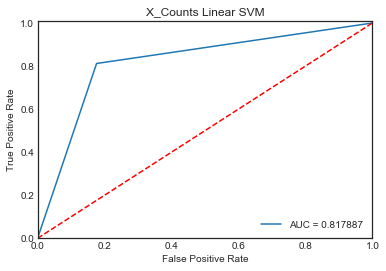

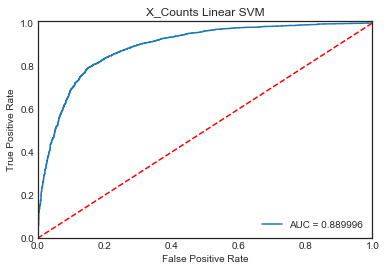

In [75]:
p = plot_ROC('X_Counts Linear SVM',auc1,fpr1,tpr1)
p.show()

p = plot_ROC('X_Counts Linear SVM',auc1p,fpr1p,tpr1p)
p.show()

<p>Let us now gerenrate the ROC curves (binary number of classes and probability based (multi-class)) for X_binary:</p>

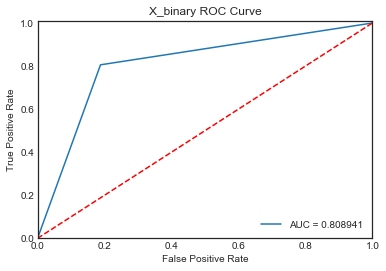

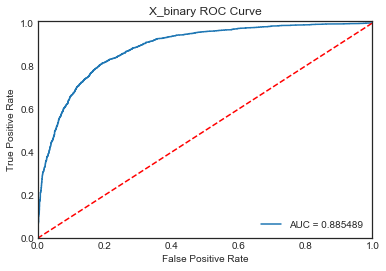

In [76]:
p2 = plot_ROC('X_binary ROC Curve',auc2,fpr2,tpr2)
p2.show()

p2 = plot_ROC('X_binary ROC Curve',auc2p,fpr2p,tpr2p)
p2.show()

<p>Let us now gerenrate the ROC curves (binary number of classes and probability based (multi-class)) for X_tfidf:</p>

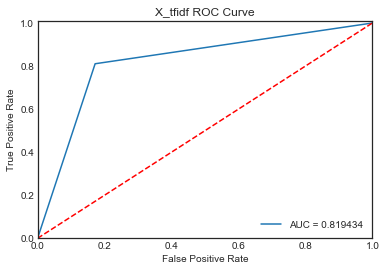

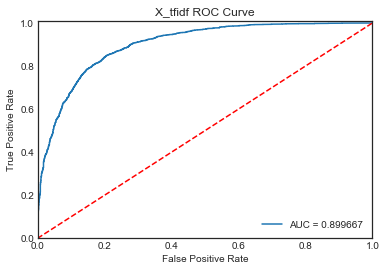

In [77]:
p = plot_ROC('X_tfidf ROC Curve',auc3,fpr3,tpr3)
p.show()

p = plot_ROC('X_tfidf ROC Curve',auc3p,fpr3p,tpr3p)
p.show()

<p>Let us now gerenrate the ROC curves (binary number of classes and probability based (multi-class)) for X_binary_imbalance:</p>

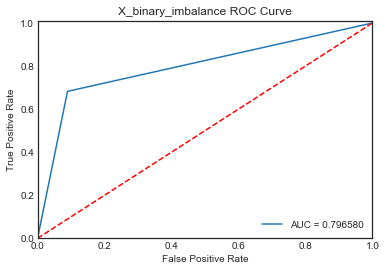

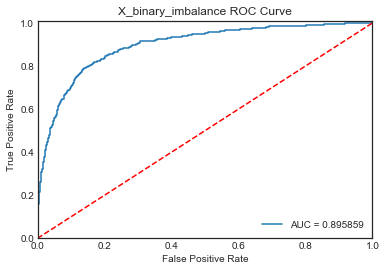

In [78]:
p = plot_ROC('X_binary_imbalance ROC Curve',auc4,fpr4,tpr4)
p.show()

p = plot_ROC('X_binary_imbalance ROC Curve',auc4p,fpr4p,tpr4p)
p.show()

<p>We see that the ROC curve is much better when we predict probabilities opposed to predicting binary values.</p>

<p>Let's now compare compare all of our design matrices. We see that all design matrices had similar AUC from the SVM model with a linear kernel. In terms of performance X_binary performed the worst with the test data and X_tfidf performed the best with the test data when we look at the probability based roc curve. We see that if we look at the binary traingle shaped ROC curves that X_tfidf performed the best and X_binary_imbalance performed the worst. We will be using probability based predictions (using decision_function) for our Kaggle model as the performance here was much better. All four design matrices had very similar AUC scores within their respective classes and their respective ROC graphs look fairly similar. Let us now calculate lift.</p>


<p>To calculate lift we need to take the roc auc of the best and worst C values and subtract their roc auc. We write a function below that finds the best and worst roc auc from the C values we constructed previously to calculate the lift of the model. The lift function is as follows:</p>

In [53]:
def lift(results): 
    sorted_results = sorted(results, key=lambda x: x[1],reverse=True)
    #best auc and corresponding c value 
    best_auc = sorted_results[0][1]
    best_c = sorted_results[0][0]
    
    #worst auc and corresponding c value
    worst_auc = sorted_results[-1][1]
    worst_c = sorted_results[-1][0]
    lift = best_auc - worst_auc
    return best_auc, worst_auc, best_c,worst_c, lift


<p>The lift for X_counts is: </p>

In [54]:
best_auc, worst_auc, best_c, worst_c, lift_val = lift(X_counts_results) 
print(lift_val)

5.40717486641e-05


<p>The lift for X_binary is:</p>

In [55]:
best_auc, worst_auc, best_c, worst_c, lift_val = lift(X_binary_results) 
print(lift_val)

3.97498286847e-05


<p>The lift for X_tfidf is: </p>

In [56]:
best_auc, worst_auc, best_c, worst_c, lift_val = lift(X_tfidf_results) 
print(lift_val)

0.000706090291093


<p>The lift for X_binary_imbalance is:</p>

In [57]:
best_auc, worst_auc, best_c, worst_c, lift_val = lift(X_imbalance_results) 
print(lift_val)

1.03755737362e-05


<p>Let us comment on these lift values. We see that the lift is very small. If we examine the randomly chosen C values from np.random.uniform(1e-4,1e4) we see that this generally chooses larger numbers than very tiny numbers. This is not the case with a logarithmic scale which would allow us to see much smaller numbers. Thus, it makes sense that the lift is small in our case.</p>

<p>Let us now take a look at the kaggle data set. We will store the kaggle test data at the same level as this notebook file. Please note that if the data set is not placed at this level the code will break, so if one is interested only in the results please do not run the following cells until Question 4.</p>

<p>Our create_model() function generates the AUC using the actual labels for the test set. In this case we do not have this data so let us rewrite that function to only return the predictions which we can submit to kaggle and view our performance.</p>

In [58]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def kaggle_model(C_val,X,Y,X_test):
    
    #Set the random seed
    np.random.seed(0)
    
    #Create and fit our Linear SVC model
    clf = LinearSVC(C=C_val) 
    clf.fit(X,Y)
    
    #Predict test data
    preds = clf.decision_function(X_test)
    return preds

<p>Let us first use Kaggle's test data with our X_counts design matrix:</p>

<p>We first need to clean the test data:</p>

In [59]:
test_data = pd.read_csv("testData.tsv",header=0,delimiter="\t",quoting=3)
num_reviews = len(test_data["review"])
clean_test_reviews = []
for i in range(0,num_reviews): 
    clean_test_reviews.append(clean_data(test_data["review"][i]))

<p>We then create our design matrices from the test data:</p>

In [60]:
#X_counts
test_data_features = vectorizer.transform(clean_test_reviews)
X_counts_test = test_data_features.toarray()

#X_binary
X_binary_test = X_counts_test.copy()
X_binary_test[X_binary_test > 0] = 1

#X_tfidf
X_tfidf_test = transformer.transform(X_counts_test)
X_tfidf_test = X_tfidf_test.toarray()

#X_binary_imbalance
np.random.seed(0)
rtd = np.random.choice(test_data.index, int(0.75*test_data.shape[0]),replace=False)
srt = test_data.drop(rtd)
X_binary_imbalance_test = X_binary_test[srt.index]
idz = test_data.iloc[srt.index]

<p>We now create our X_counts kaggle model:</p>

In [80]:
#Test X_counts feature 
result= kaggle_model(C_X_counts,X_counts,train_data["sentiment"],X_counts_test)
output = pd.DataFrame( data={"id":test_data["id"], "sentiment":result} )
output.to_csv('Bag_of_Words_model.csv', index=False, quoting=3)

<p>Using, X_counts the AUC was 0.87634 as graded by Kaggle.</p>

<p>Let us now use X_binary:</p>

In [81]:
result= kaggle_model(C_X_binary,X_binary,train_data["sentiment"],X_binary_test)
output = pd.DataFrame( data={"id":test_data["id"], "sentiment":result} )
output.to_csv('Bag_of_Words_model.csv', index=False, quoting=3)

<p>Using, X_binary the AUC was 0.87803 as graded by Kaggle.</p>

<p>Let us now use X_tfidf:</p>

In [82]:
result= kaggle_model(C_X_tfidf,X_tfidf,train_data["sentiment"],X_tfidf_test)
output = pd.DataFrame( data={"id":test_data["id"], "sentiment":result} )
output.to_csv('Bag_of_Words_model.csv', index=False, quoting=3)

<p>Using X_tfidf, the AUC was 0.89081 as graded by Kaggle.</p>

<p>Let us finally use X_binary_imbalance:</p>

In [83]:
result= kaggle_model(C_X_imbalance,X_binary_imbalance,pos_sent_dropped["sentiment"],X_binary_test)
output = pd.DataFrame( data={"id":test_data["id"], "sentiment":result} )
output.to_csv('Bag_of_Words_model.csv', index=False, quoting=3)

<p>Using X_binary_imbalance, the AUC was 0.87922 as graded by Kaggle:</p>

<p>Our final results are as follows: </p>
<table> 
<tr>
<td>Design Matrix</td>
<td>AUC</td>
</tr>
<tr>
<td>X_counts</td>
<td>0.87634</td>
</tr>
<tr>
<td>X_binary</td>
<td>0.87803</td>
</tr>
<tr>
<td>X_tfidf</td>
<td>0.89081</td>
</tr>
<tr>
<td>X_binary_imbalance</td>
<td>0.87922</td>
</tr>
</table>


<p>Looking at the performance of all our models, we see that using X_tfidf produced the best results. The worst results came from the X_counts design matrix.</p>

<center><h2><font color='black'>Question 4</font></h2></center>

<p>Let us now generate a learning curve and create a logisitc regression model to use with X_counts. To generate the learning curve we can refer to the sklearn example found <a href='http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html'>here</a>. We can use their plotting function to pass in our logistic regression model, a title, our X_counts, our sentiment data from train_data, 5 fold cross validation, and a list of trading sizes for the learning curve graph.</p>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    #Create the figure with labels 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    #Get learning curve data from sklean learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    #Plot the training score against the training sizes
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    #Arrange the plot legend 
    plt.legend(loc="best")
    
    return plt

<p>Let us now create the logistic regression model and plot the learning curve for the X_counts design matrix with 5 fold cross validation and training_sizes = [100,500,1000,2000,3000,4000,5000,7500,10000,15000,20000]. We do so as follows:</p>

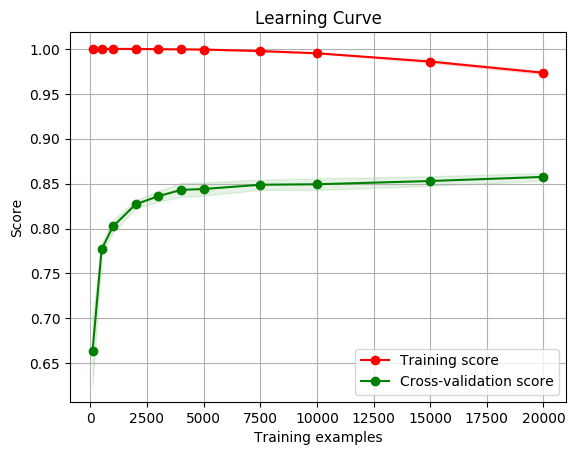

In [66]:
#Remove outdated version plot warning 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Reset style back
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LogisticRegression

#Create Logistic Regression Model
estimator = LogisticRegression()

#Title of our plot 
title = 'Learning Curve'

#Plot the learning curve through sklearn function
plt = plot_learning_curve(estimator, title, X_counts, train_data["sentiment"], cv=5,train_sizes=[100, 500, 1000, 2000,
3000, 4000, 5000, 7500, 10000, 15000, 20000],n_jobs=-1)
plt.show()

<p>Let us now talk about this learning curve: </p>

<p>Above we see that we have the X_counts score for a variety of training split sizes. We see that the cross validation increases with the number of training examples. There is a drastic jump in score from 100 to 500 training samples and the entire interval between 100 to 5000 training examples has a drastic change in score. However, we see that after 6250 training samples our score converges to around 0.85 and increasing the training examples does not increase performance drastically. After this point, an increase in training examples does not improve our model greatly. This might not be the case with a model such as a convolutional neural network, however we see that our Logistic Regression model sees no great performance increase after 6250 training samples. The training score decreases as we add more samples. This makes sense as we have more data. More data means we are less likely to overfit the model on all of the examples.</p>